## Cross validation - Possum Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data = pd.read_csv('./possum.csv')
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
data.shape

(104, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [6]:
data.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

### Filling the null values

In [7]:
data.age.fillna(data.age.mean(), inplace=True)
data.footlgth.fillna(data.age.mean(), inplace=True)
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [8]:
data.isnull().mean()*100

case        0.0
site        0.0
Pop         0.0
sex         0.0
age         0.0
hdlngth     0.0
skullw      0.0
totlngth    0.0
taill       0.0
footlgth    0.0
earconch    0.0
eye         0.0
chest       0.0
belly       0.0
dtype: float64

### Univariate analysis;

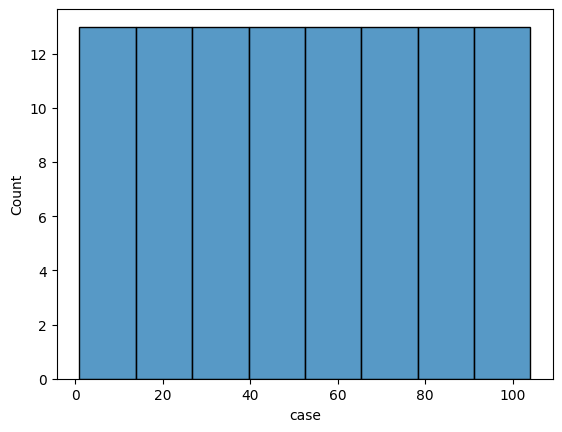

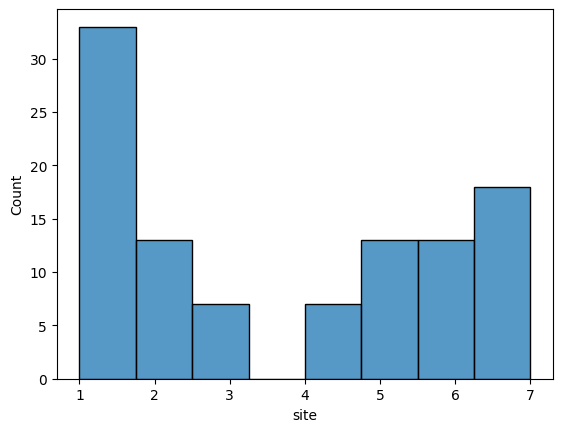

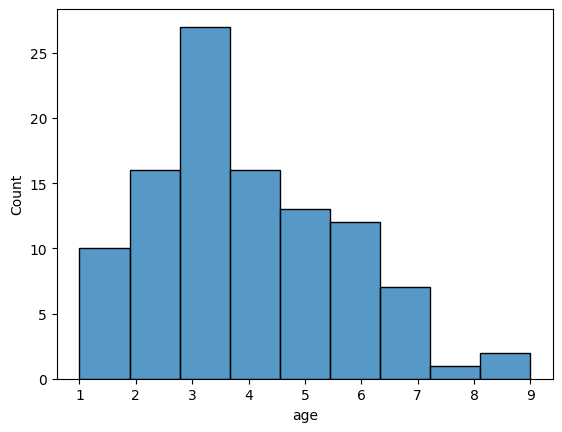

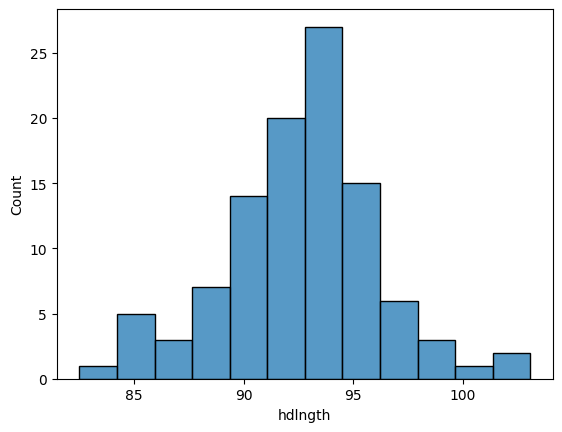

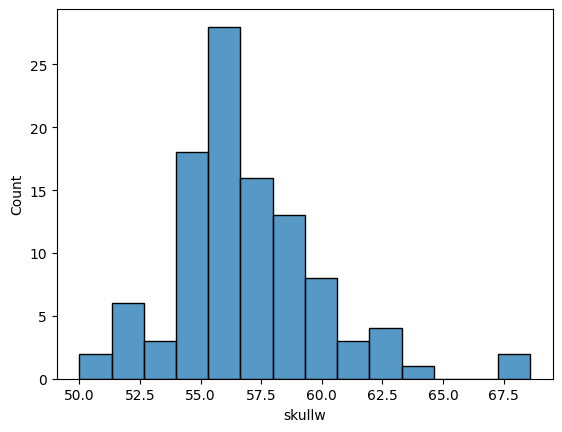

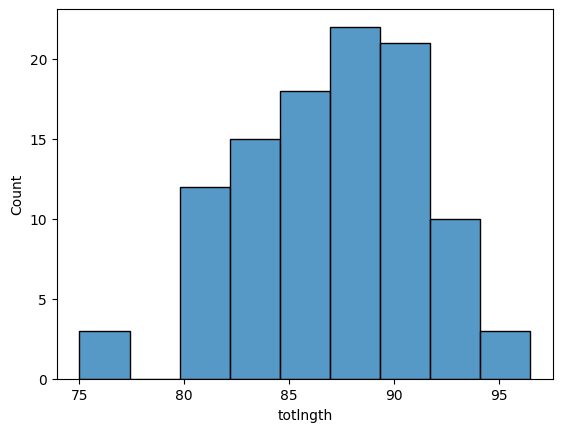

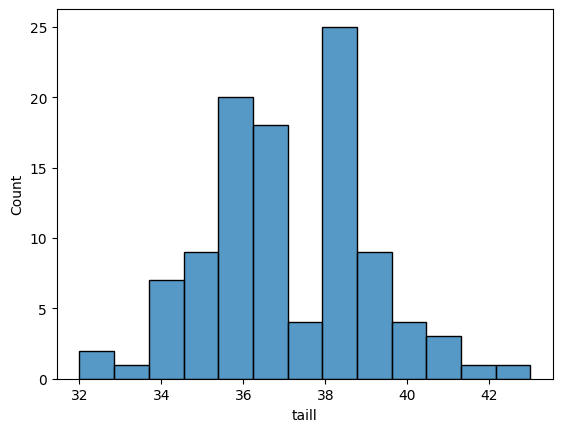

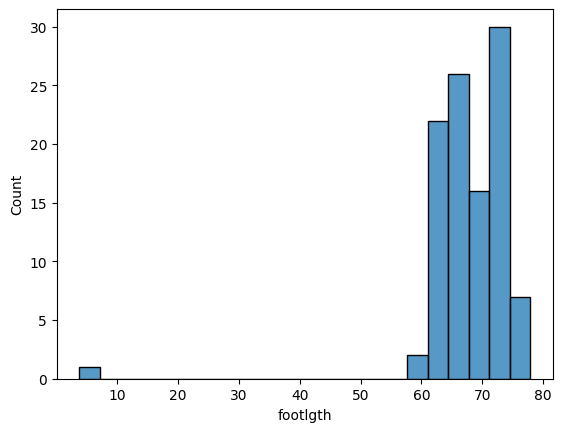

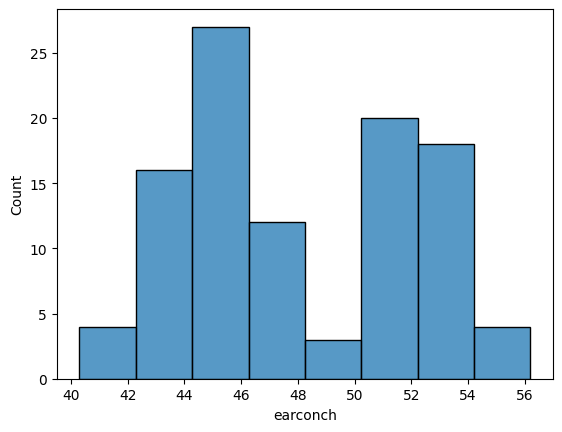

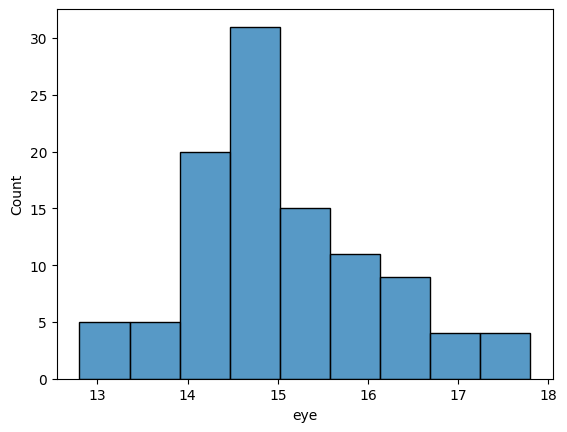

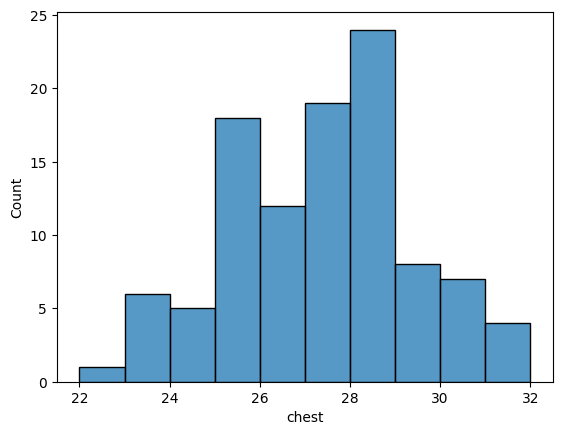

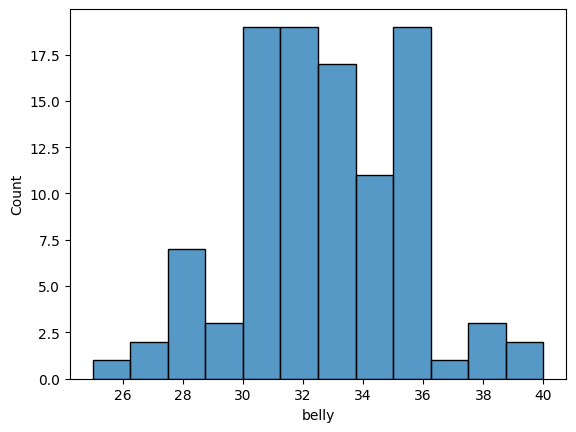

In [9]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x =data[i] )
        plt.show()

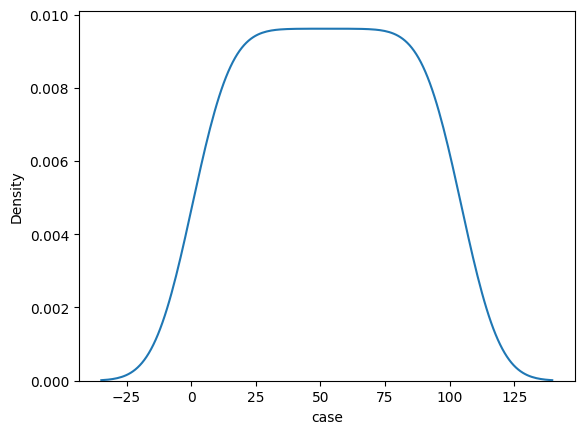

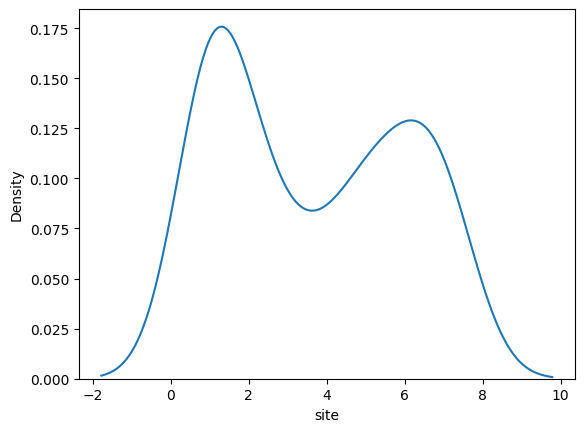

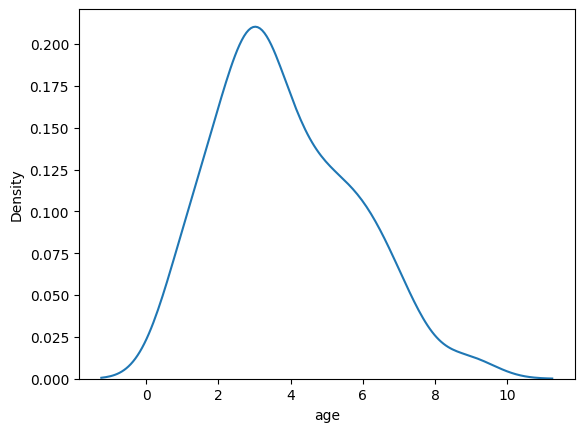

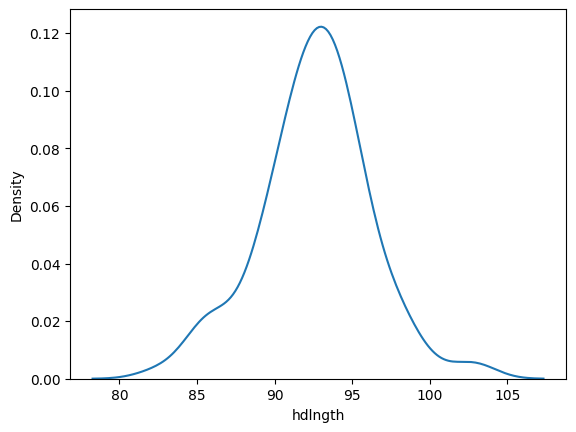

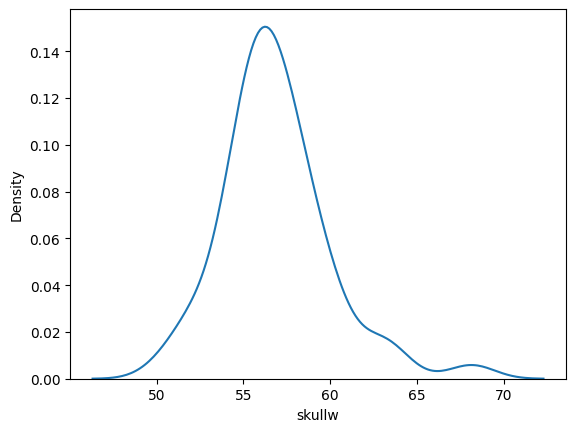

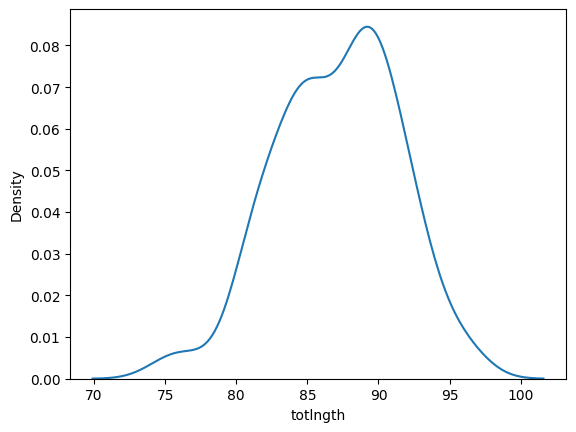

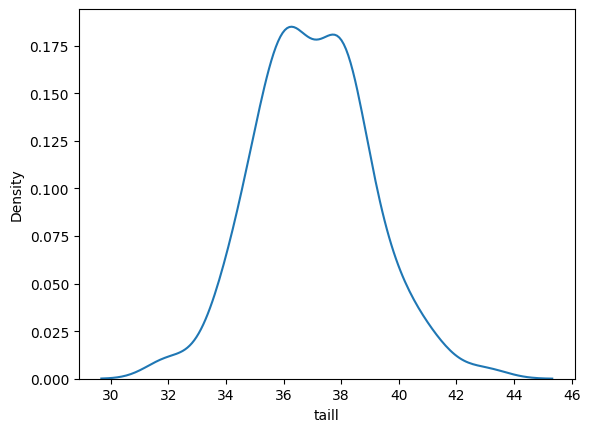

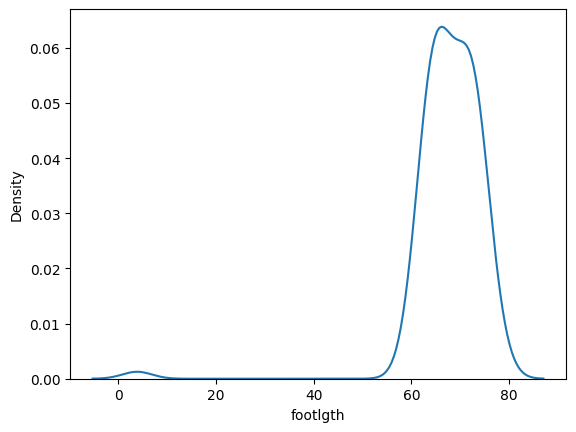

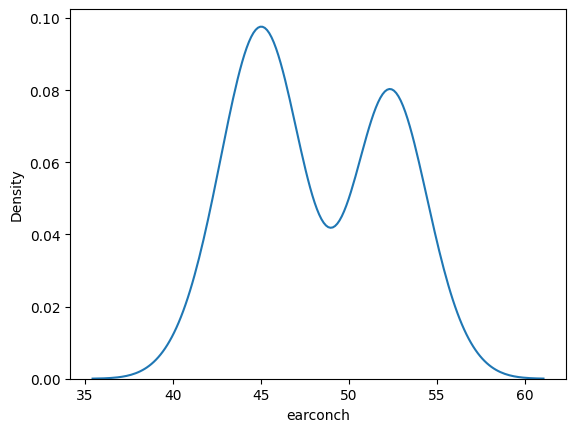

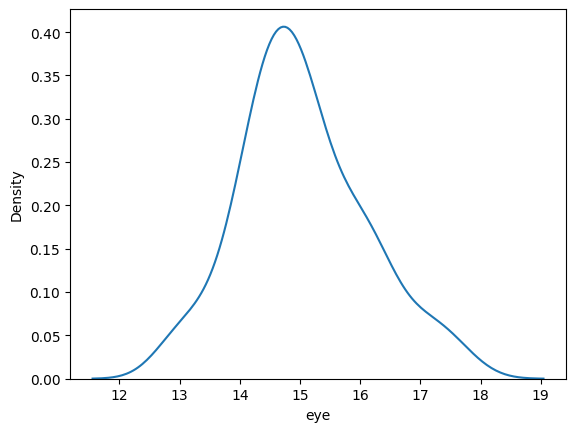

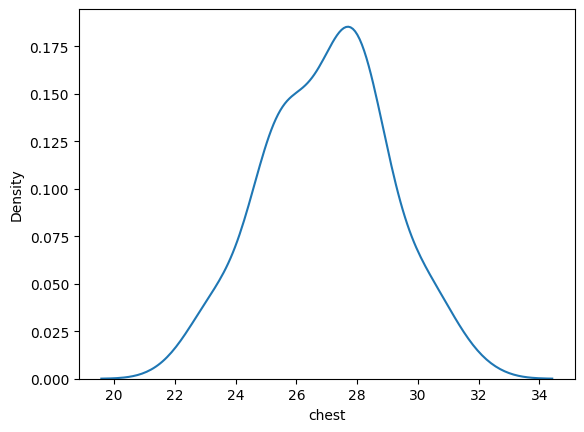

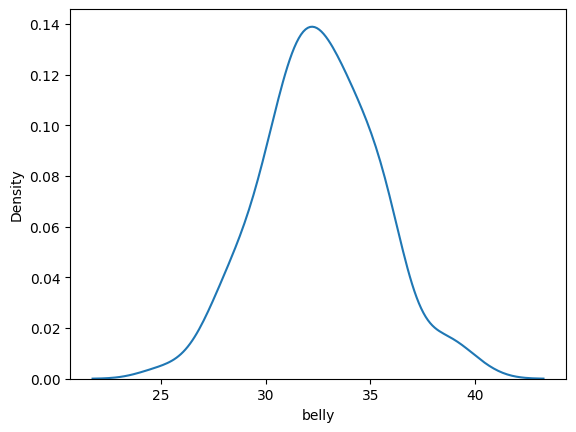

In [10]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x =data[i] )
        plt.show()

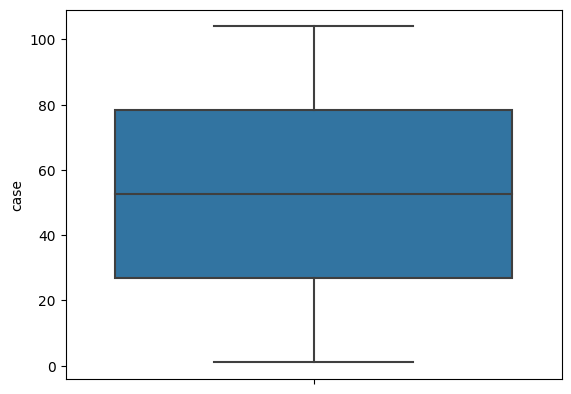

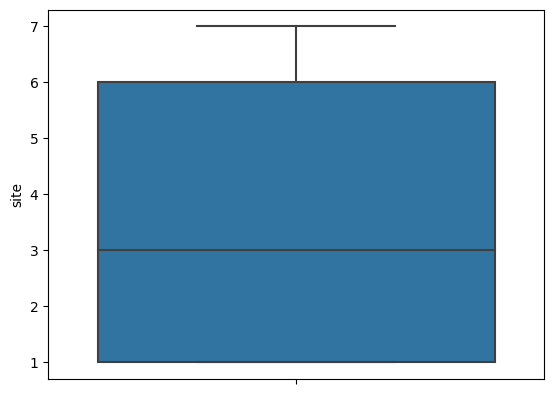

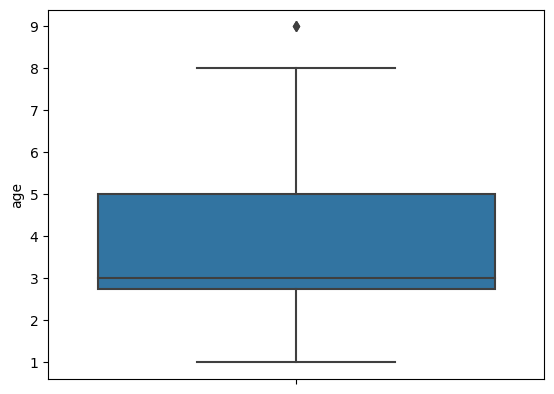

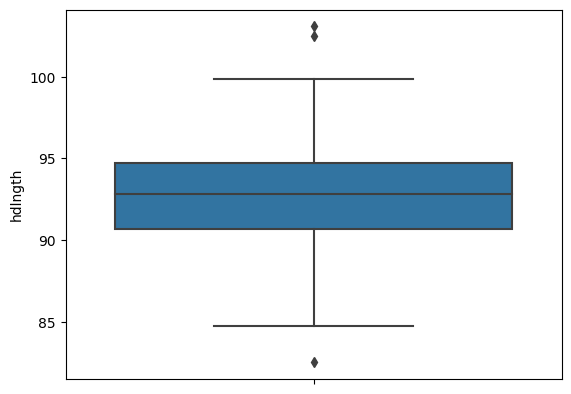

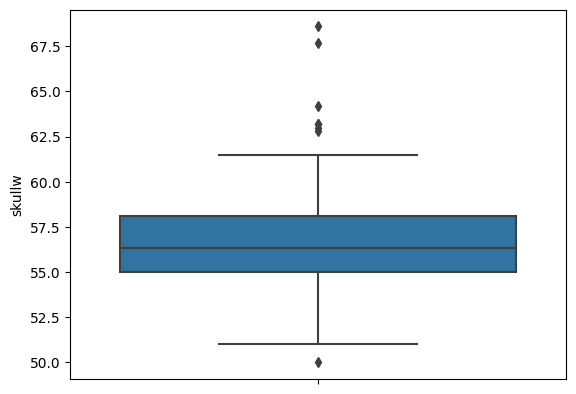

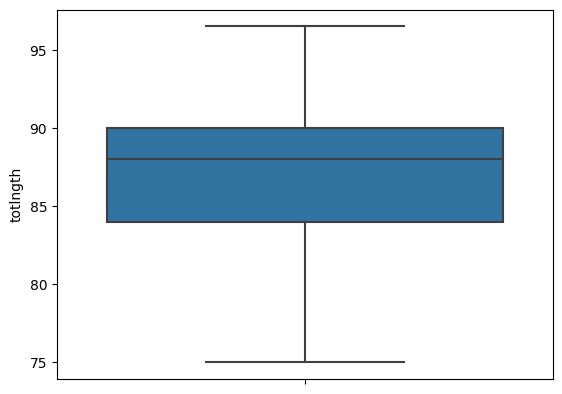

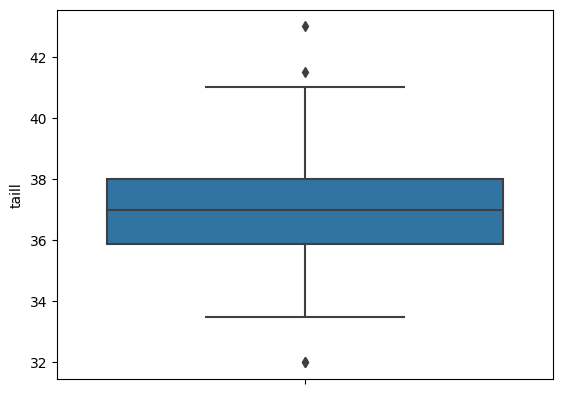

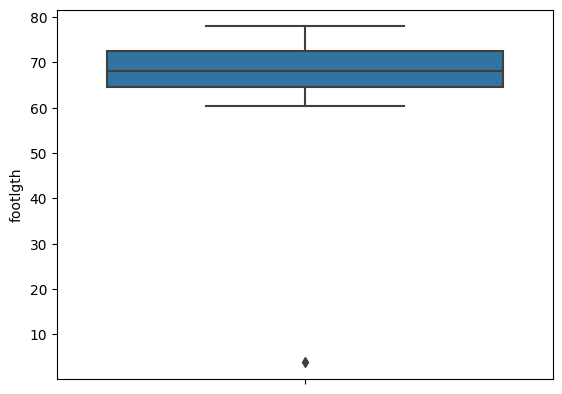

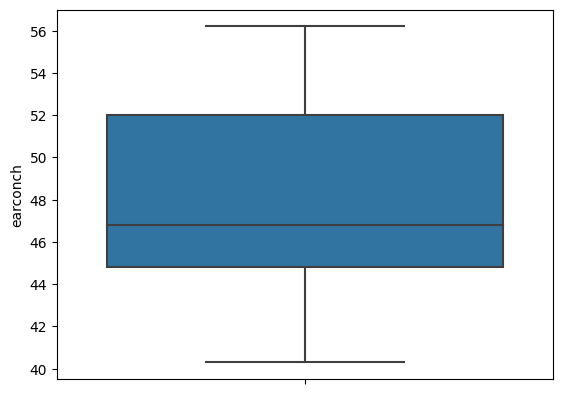

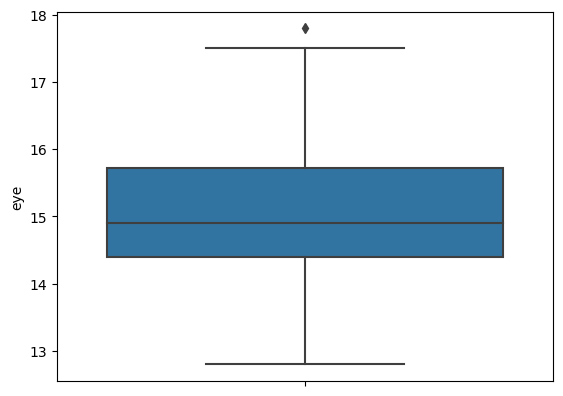

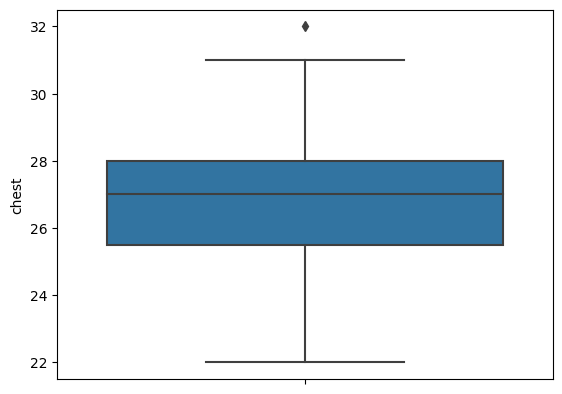

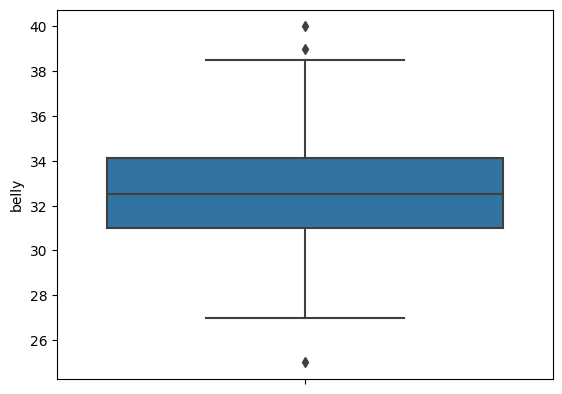

In [11]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i])
        plt.show();

### Label encoding the categorical columns

In [12]:
le = LabelEncoder()

In [13]:
data['Pop'] = le.fit_transform(data['Pop'])

In [14]:
data['sex'] = le.fit_transform(data['sex'])

### Checking the correlation with the target 'footlgth'

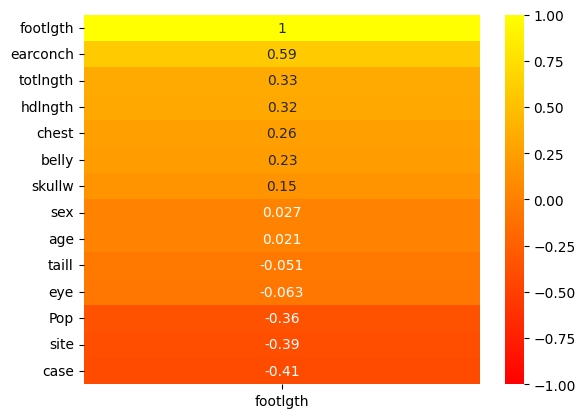

In [15]:
sns.heatmap(data.corr()[["footlgth"]].sort_values(by="footlgth", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

#### Lets take only the columns with good correlation with the target

In [16]:
x= data[[ 'hdlngth', 'skullw', 'totlngth','earconch', 'chest', 'belly']].values

In [17]:
y = data[['footlgth']].values

### Feature Scaling 

In [18]:
rs = RobustScaler()

In [19]:
x = rs.fit_transform(x)

### model buliding

In [20]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [21]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  4.327341614174545
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  4.244731706188273
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  5.893005046215245
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  4.137446223765664
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  3.8357657292690504
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  3.894653147192526
***********************************************

### We can see that "RandomForestRegressor" is having the best overall perfomance so far. We may proceed with it.

In [22]:
model = RandomForestRegressor()